In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\vivek\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\vivek\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\vivek\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
data = pd.read_csv("../pl_stats.csv")

In [3]:
squad_names=data['Squad']

In [4]:
def_pressing_stats = ['Tkl','TklW','Def 3rd','Mid 3rd','Att 3rd','Tkl','Att','Tkl%','Lost','Blocks','Sh','Pass','Int','Tkl+Int','Clr','Err']

In [5]:
data_pressing = data.loc[:,def_pressing_stats]

In [6]:
shot_goal_creation_stats = ['SCA','SCA90','GCA','GCA90']

In [7]:
possession_stats = ['Poss','90s','Touches','Def Pen','Def 3rd','Mid 3rd','Att 3rd','Att Pen','Live','Att','Succ','Succ%','Tkld','Tkld%','Carries','TotDist','PrgDist','PrgC','1/3','CPA','Mis','Dis','Rec','PrgR']

In [8]:
data_possession = data.loc[:,possession_stats]

In [9]:
data_pressing.columns, data_possession.columns

(Index(['Tkl', 'TklW', 'Def 3rd', 'Mid 3rd', 'Att 3rd', 'Tkl', 'Att', 'Tkl%',
        'Lost', 'Blocks', 'Sh', 'Pass', 'Int', 'Tkl+Int', 'Clr', 'Err'],
       dtype='object'),
 Index(['Poss', '90s', 'Touches', 'Def Pen', 'Def 3rd', 'Mid 3rd', 'Att 3rd',
        'Att Pen', 'Live', 'Att', 'Succ', 'Succ%', 'Tkld', 'Tkld%', 'Carries',
        'TotDist', 'PrgDist', 'PrgC', '1/3', 'CPA', 'Mis', 'Dis', 'Rec',
        'PrgR'],
       dtype='object'))

In [10]:
data_pressing_possession = data_pressing.merge(data_possession).set_index(squad_names)

In [11]:
data_pressing_possession.index

Index(['Arsenal', 'Aston Villa', 'Bournemouth', 'Brentford', 'Brighton',
       'Chelsea', 'Crystal Palace', 'Everton', 'Fulham', 'Leeds United',
       'Leicester City', 'Liverpool', 'Manchester City', 'Manchester Utd',
       'Newcastle Utd', 'Nott'ham Forest', 'Southampton', 'Tottenham',
       'West Ham', 'Wolves'],
      dtype='object', name='Squad')

In [12]:
data_pressing_possession_corr = data_pressing_possession.corr()

<AxesSubplot:>

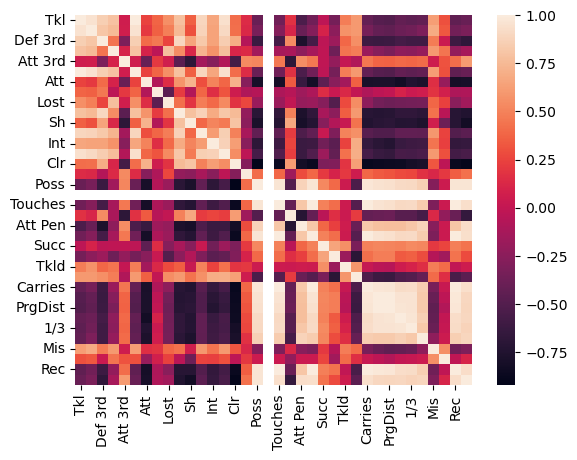

In [13]:
sns.heatmap(data_pressing_possession_corr)

In [14]:
data_pressing_possession_corr = data_pressing_possession_corr[abs(data_pressing_possession_corr)>0.65]

In [15]:
correlated_features = data_pressing_possession_corr.loc[def_pressing_stats,possession_stats]

<AxesSubplot:>

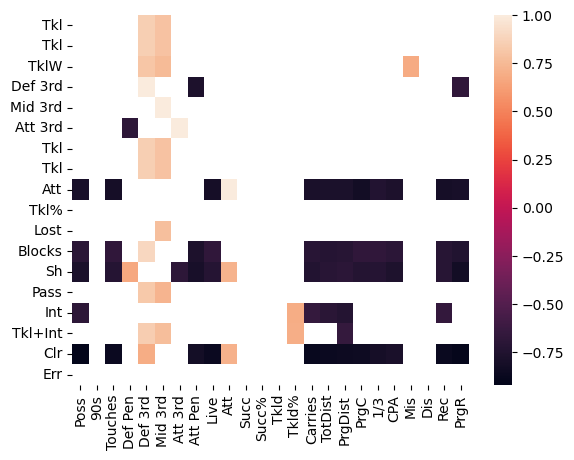

In [16]:
sns.heatmap(correlated_features)

In [17]:
correlated_features_df = correlated_features.stack().index
correlated_features_df=pd.DataFrame(correlated_features_df)

correlated_features_df

,0
0,"(Tkl, Def 3rd)"
1,"(Tkl, Mid 3rd)"
2,"(Tkl, Def 3rd)"
3,"(Tkl, Mid 3rd)"
4,"(TklW, Def 3rd)"
...,...
79,"(Clr, PrgC)"
80,"(Clr, 1/3)"
81,"(Clr, CPA)"
82,"(Clr, Rec)"


In [18]:
poss_press_stats=data_pressing_possession_corr.loc[['Def 3rd','Mid 3rd','Att 3rd','Tkl','Att','Tkl%','Lost','Blocks','Sh','Pass','Int','Tkl+Int','Clr','Err'],'Poss'].dropna().index

In [47]:
data_pressing_possession

,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Tkl,Att,Tkl%,Lost,Blocks,...,Carries,TotDist,PrgDist,PrgC,1/3,CPA,Mis,Dis,Rec,PrgR
Squad,,,,,,,,,,,,,,,,,,,,,
Arsenal,568,343,238,212,118,568,429,48.9,260,362,...,15924,84012,44202,824,583,281,526,378,18101,2024
Aston Villa,633,338,305,251,77,633,585,48.5,333,438,...,12294,65583,33156,637,434,174,565,371,13587,1227
Bournemouth,618,371,316,249,53,618,591,42.2,350,499,...,10336,55322,27419,504,388,144,589,367,11617,986
Brentford,587,337,270,228,89,587,882,42.2,346,456,...,10408,49009,23987,392,299,102,520,335,11203,1121
Brighton,616,340,270,242,104,616,279,47.4,295,392,...,16331,83718,43965,809,547,250,558,324,18991,1828
Chelsea,740,445,363,267,110,740,290,50.8,323,466,...,16538,83509,43596,829,622,216,568,381,19065,1729
Crystal Palace,690,421,354,246,90,690,446,52.8,251,463,...,11687,60301,30015,556,393,206,643,457,13304,1238
Everton,708,424,362,257,89,708,814,50.6,302,510,...,10479,56737,27858,500,391,137,605,300,11708,1042
Fulham,625,350,295,229,101,625,438,51.1,286,455,...,12250,68158,35319,662,472,124,535,379,13847,1316


In [33]:
data_pressing_possession.loc[i,poss_press_stats]

Att       429.0
Blocks    362.0
Sh         86.0
Int       237.0
Clr       599.0
Name: Arsenal, dtype: float64

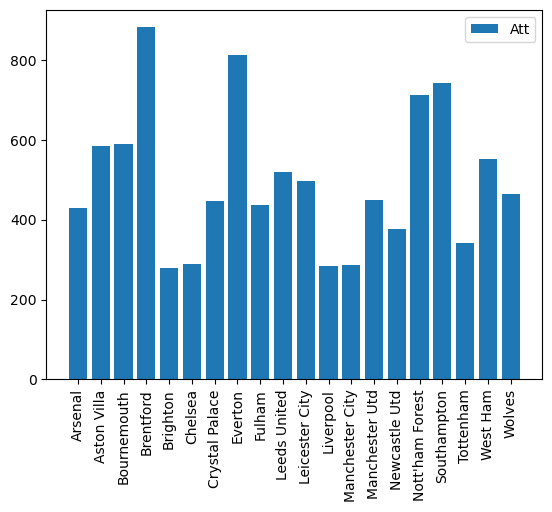

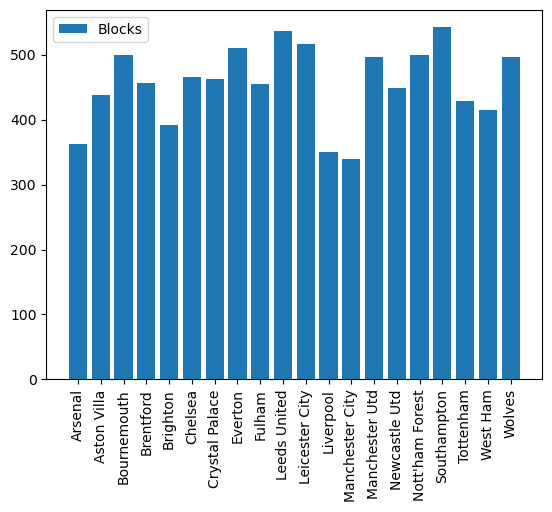

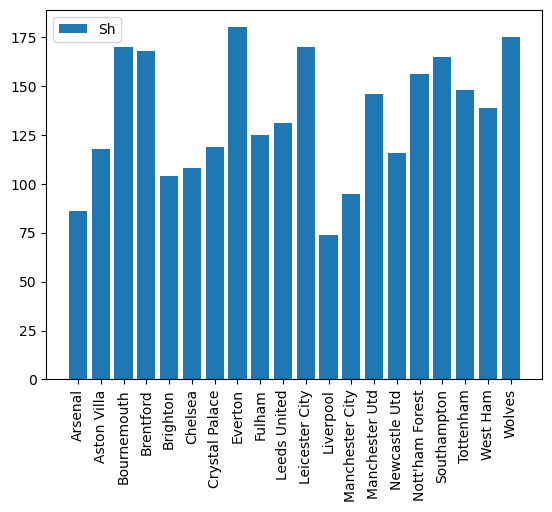

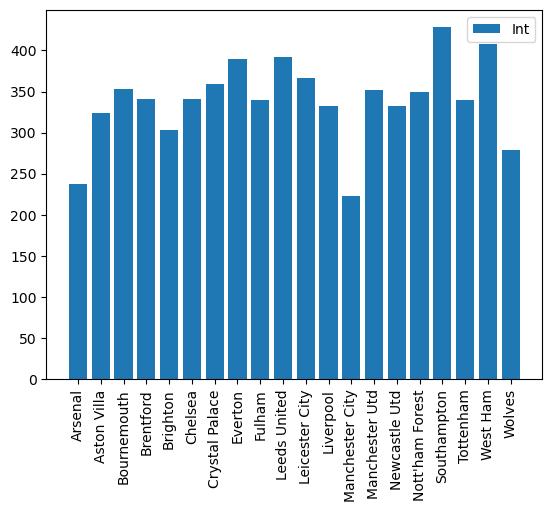

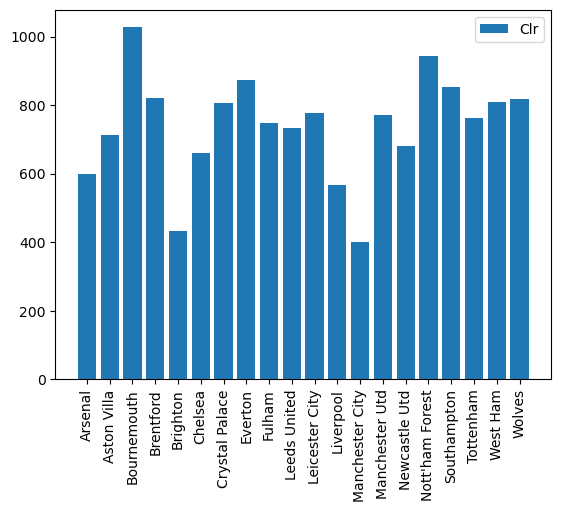

In [54]:
for i in poss_press_stats:
    plt.figure()
    plt.xticks(rotation=90)
    plt.bar(data_pressing_possession.index,data_pressing_possession[i],label=i)
    plt.legend()
    plt.plot()